In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


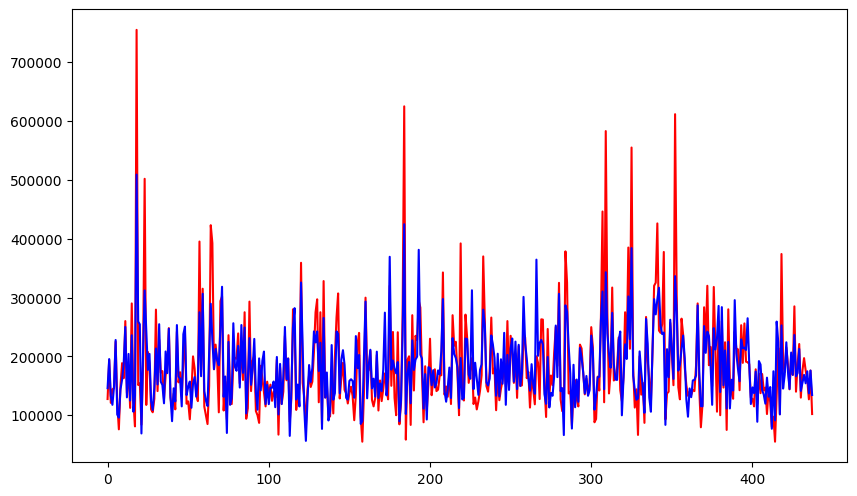

In [3]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].dropna().median(), inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].dropna().median(), inplace=True)
features = ["LotFrontage","YearBuilt","OverallQual","GrLivArea","TotalBsmtSF","FullBath","GarageCars","KitchenAbvGr","EnclosedPorch"]
X = pd.get_dummies(train_df[features])
Y = train_df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

from sklearn.svm import LinearSVR
regr = LinearSVR()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)

plt.figure(figsize=(10,6), dpi=100)
plt.plot(np.array(y_test), c='r')
plt.plot(pred, c='b')
# plt.savefig('start_scaling.png')
plt.show()

In [4]:
# test_df = test_df.fillna(test_df.median())
# X_test =  pd.get_dummies(test_df[features])

# regr.fit(X, Y)
# Y_pred = regr.predict(X_test)
# output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': Y_pred})
# output.to_csv('first.csv', index=False)
# print("Your submission was successfully saved!")